http://www.maine.gov/megis/catalog/

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pysal as ps
import re


%matplotlib inline

In [2]:
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/maine_landfills/maine_closed_landfills.csv')

In [3]:
df.head(40)

,Site Name,Site Number,Address,Town,Description,Summary,Closed,Latitude,Longitude
0,FRYEBURG LANDFILL,29512,RTE 5,FRYEBURG,10 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED BY...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,43.97657,-70.95702
1,GLENBURN LANDFILL,27545,HUDSON RD RTE 221,GLENBURN,2 ACRE LANDFILL CLOSED IN 1991 AS REQUIRED BY ...,CLOSED IN 1991 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.94516,-68.84681
2,COPLIN PLANTATION DUMP_IN QUESTION,29347,RTE 4,WYMAN TWP,CLOSED OR NEVER EXISTED. LOCATION ARBITRARILY ...,CLOSED OR NEVER EXISTED. LOCATION ARBITRARILY ...,PRE-1976,45.11971,-70.34821
3,ST AGATHA LANDFILL,29881,MARQUIS RD,ST AGATHA,2 ACRE LANDFILL CLOSED IN 1995 AS REQUIRED BY ...,CLOSED IN 1995 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,47.23753,-68.38370
4,OLD ORCHARD BEACH OLD DUMP SITE,79846,WALNUT AND MILLIKEN ST,OLD ORCHARD BEACH,NaN,INACTIVE AND RESTRICTED. ADJACENT TO TOWN PARK...,PRE-1976,43.52129,-70.37277
5,WATERVILLE LANDFILL,27715,WEBB RD,WATERVILLE,56 ACRE LANDFILL CLOSED IN 1998 AS REQUIRED BY...,CLOSED IN 1998 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.52166,-69.70389
6,CHARLOTTE LANDFILL,29686,OFF RTE 214 SMITH RIDGE RD,CHARLOTTE,0.5 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED B...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,45.00089,-67.28527
7,NORTHPORT LANDFILL,29408,NEBRASKA RD,NORTHPORT,3 ACRE LANDFILL CLOSED IN 2001 AS REQUIRED BY ...,CLOSED IN 2001 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.32867,-68.97773
8,SINCLAIR LANDFILL,29878,HEBERT RD,T17 R04 WELS,2 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED BY ...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,47.19362,-68.24743
9,WOOLWICH LANDFILL,27639,RTE 127 MIDDLE RD,WOOLWICH,5 ACRE LANDFILL CLOSED IN 1995 AS REQUIRED BY ...,CLOSED IN 1995 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,43.93235,-69.80223


In [4]:
df['acreage'] = df['Description'].str.split(r'(\d\d)')
df.head()
# remove_beginning = re.split(r'\bPROCEEDINGS \d \(\d\d\:\d\d \w\.m\.\)', sample_transcript)


,Site Name,Site Number,Address,Town,Description,Summary,Closed,Latitude,Longitude,acreage
0,FRYEBURG LANDFILL,29512,RTE 5,FRYEBURG,10 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED BY...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,43.97657,-70.95702,"[, 10, ACRE LANDFILL CLOSED IN , 19, , 93, A..."
1,GLENBURN LANDFILL,27545,HUDSON RD RTE 221,GLENBURN,2 ACRE LANDFILL CLOSED IN 1991 AS REQUIRED BY ...,CLOSED IN 1991 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.94516,-68.84681,"[2 ACRE LANDFILL CLOSED IN , 19, , 91, AS REQ..."
2,COPLIN PLANTATION DUMP_IN QUESTION,29347,RTE 4,WYMAN TWP,CLOSED OR NEVER EXISTED. LOCATION ARBITRARILY ...,CLOSED OR NEVER EXISTED. LOCATION ARBITRARILY ...,PRE-1976,45.11971,-70.34821,[CLOSED OR NEVER EXISTED. LOCATION ARBITRARILY...
3,ST AGATHA LANDFILL,29881,MARQUIS RD,ST AGATHA,2 ACRE LANDFILL CLOSED IN 1995 AS REQUIRED BY ...,CLOSED IN 1995 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,47.23753,-68.38370,"[2 ACRE LANDFILL CLOSED IN , 19, , 95, AS REQ..."
4,OLD ORCHARD BEACH OLD DUMP SITE,79846,WALNUT AND MILLIKEN ST,OLD ORCHARD BEACH,NaN,INACTIVE AND RESTRICTED. ADJACENT TO TOWN PARK...,PRE-1976,43.52129,-70.37277,NaN


In [5]:
df['Town'].value_counts().head(10)

OLD ORCHARD BEACH    4
AUBURN               4
BRUNSWICK            3
PORTLAND             3
YORK                 3
STANDISH             2
MADAWASKA            2
MADISON              2
FARMINGTON           2
WALDOBORO            2
Name: Town, dtype: int64

In [6]:
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/maine_landfills/maine_closed_landfills.csv')
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
df = gpd.GeoDataFrame(df, geometry=points)
df.crs = {'init':'epsg:5070'}
df.head(2)

,Site Name,Site Number,Address,Town,Description,Summary,Closed,Latitude,Longitude,geometry
0,FRYEBURG LANDFILL,29512,RTE 5,FRYEBURG,10 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED BY...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,43.97657,-70.95702,POINT (-70.95702 43.97657)
1,GLENBURN LANDFILL,27545,HUDSON RD RTE 221,GLENBURN,2 ACRE LANDFILL CLOSED IN 1991 AS REQUIRED BY ...,CLOSED IN 1991 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.94516,-68.84681,POINT (-68.84680999999999 44.94515999999999)


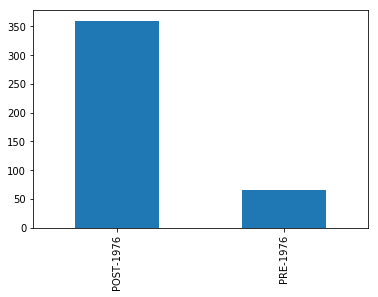

In [7]:
#were most closed before or after 1976?
df['Closed'].value_counts().plot(kind='bar')

In [8]:
df[df['Closed'].str.contains('POST')]

,Site Name,Site Number,Address,Town,Description,Summary,Closed,Latitude,Longitude,geometry
0,FRYEBURG LANDFILL,29512,RTE 5,FRYEBURG,10 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED BY...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,43.97657,-70.95702,POINT (-70.95702 43.97657)
1,GLENBURN LANDFILL,27545,HUDSON RD RTE 221,GLENBURN,2 ACRE LANDFILL CLOSED IN 1991 AS REQUIRED BY ...,CLOSED IN 1991 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.94516,-68.84681,POINT (-68.84680999999999 44.94515999999999)
3,ST AGATHA LANDFILL,29881,MARQUIS RD,ST AGATHA,2 ACRE LANDFILL CLOSED IN 1995 AS REQUIRED BY ...,CLOSED IN 1995 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,47.23753,-68.38370,POINT (-68.3837 47.23753)
5,WATERVILLE LANDFILL,27715,WEBB RD,WATERVILLE,56 ACRE LANDFILL CLOSED IN 1998 AS REQUIRED BY...,CLOSED IN 1998 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.52166,-69.70389,POINT (-69.70389 44.52166)
6,CHARLOTTE LANDFILL,29686,OFF RTE 214 SMITH RIDGE RD,CHARLOTTE,0.5 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED B...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,45.00089,-67.28527,POINT (-67.28527 45.00089000000001)
7,NORTHPORT LANDFILL,29408,NEBRASKA RD,NORTHPORT,3 ACRE LANDFILL CLOSED IN 2001 AS REQUIRED BY ...,CLOSED IN 2001 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.32867,-68.97773,POINT (-68.97773000000001 44.32867)
8,SINCLAIR LANDFILL,29878,HEBERT RD,T17 R04 WELS,2 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED BY ...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,47.19362,-68.24743,POINT (-68.24743000000001 47.19362)
9,WOOLWICH LANDFILL,27639,RTE 127 MIDDLE RD,WOOLWICH,5 ACRE LANDFILL CLOSED IN 1995 AS REQUIRED BY ...,CLOSED IN 1995 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,43.93235,-69.80223,POINT (-69.80223000000001 43.93235)
10,BRIDGEWATER BLAINE LANDFILL,29813,CORNER RD,BRIDGEWATER,7.5 ACRE LANDFILL CLOSED IN 1994 AS REQUIRED B...,CLOSED IN 1994 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,46.45712,-67.83566,POINT (-67.83566 46.45712)
11,LEE LANDFILL,29633,DAM RD,LEE,2.5 ACRE LANDFILL CLOSED IN 1996 AS REQUIRED B...,CLOSED IN 1996 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,45.36108,-68.29317,POINT (-68.29316999999999 45.36108)


In [9]:
#assign a color based on whether it was before/after
#1976
def color(c):
    if c['Closed'] == 'POST-1976':
        return 'green'
    elif c['Closed'] == 'PRE-1976':
        return 'orange'
    else:
        return 'white'
    
df['color'] = df.apply(color, axis=1)
df.head()

,Site Name,Site Number,Address,Town,Description,Summary,Closed,Latitude,Longitude,geometry,color
0,FRYEBURG LANDFILL,29512,RTE 5,FRYEBURG,10 ACRE LANDFILL CLOSED IN 1993 AS REQUIRED BY...,CLOSED IN 1993 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,43.97657,-70.95702,POINT (-70.95702 43.97657),green
1,GLENBURN LANDFILL,27545,HUDSON RD RTE 221,GLENBURN,2 ACRE LANDFILL CLOSED IN 1991 AS REQUIRED BY ...,CLOSED IN 1991 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,44.94516,-68.84681,POINT (-68.84680999999999 44.94515999999999),green
2,COPLIN PLANTATION DUMP_IN QUESTION,29347,RTE 4,WYMAN TWP,CLOSED OR NEVER EXISTED. LOCATION ARBITRARILY ...,CLOSED OR NEVER EXISTED. LOCATION ARBITRARILY ...,PRE-1976,45.11971,-70.34821,POINT (-70.34820999999999 45.11971),orange
3,ST AGATHA LANDFILL,29881,MARQUIS RD,ST AGATHA,2 ACRE LANDFILL CLOSED IN 1995 AS REQUIRED BY ...,CLOSED IN 1995 AS REQUIRED BY THE MEDEP LANDFI...,POST-1976,47.23753,-68.38370,POINT (-68.3837 47.23753),green
4,OLD ORCHARD BEACH OLD DUMP SITE,79846,WALNUT AND MILLIKEN ST,OLD ORCHARD BEACH,NaN,INACTIVE AND RESTRICTED. ADJACENT TO TOWN PARK...,PRE-1976,43.52129,-70.37277,POINT (-70.37276999999999 43.52129),orange


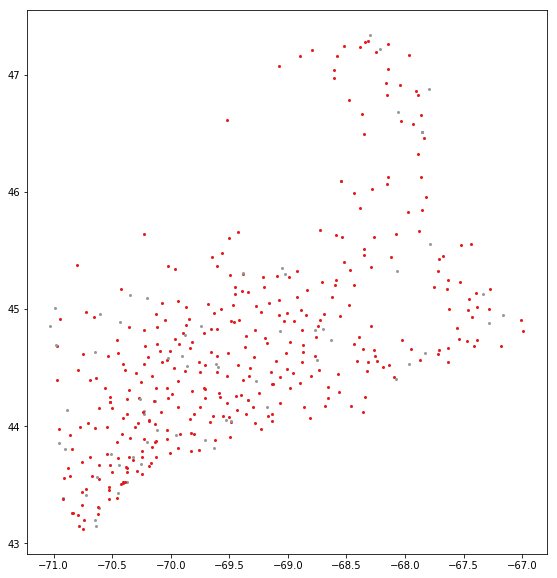

In [10]:
df.plot(column='color',figsize=(20,10))

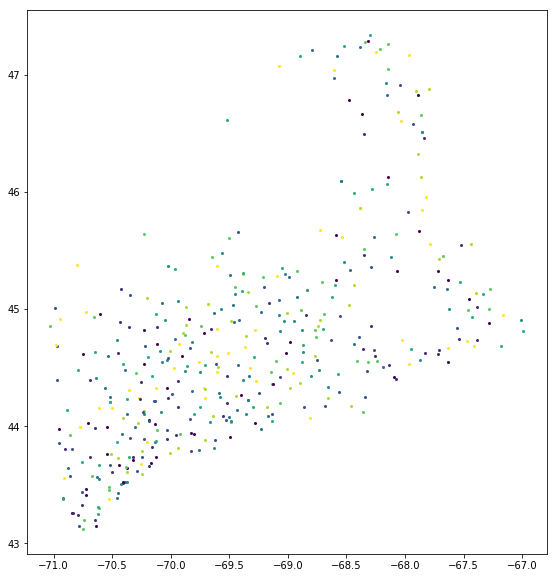

In [18]:
df.plot(figsize=(20,10))

In [ ]:
#color dots based on pre/post 1976 closures

In [16]:
maine = gpd.read_file('/Users/kaitlincough/Documents/data_studio/data_studio_projects/shapefiles/maine_shapefile/Cnty24L.shp')

In [14]:
maine.head()

,FMNOTE,FMPROCSS,FMSRC,FMSRCDAT,FMSRCORG,FMUPDDAT,FMUPDORG,LAND,RTAC,SOURCE,Shape_len,TYPE,geometry
0,,put,,1995-06-01,megis,1996-01-01,megis,y,,17,12.384992,coastline,LINESTRING (658242.7501241006 4961404.99989812...
1,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,7.911707,coastline,LINESTRING (644393.7500430336 4961282.99996997...
2,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,33.630542,coastline,LINESTRING (518014.9063850269 4961068.00008972...
3,,dig,24k,1899-12-30,usgs,1899-12-30,,y,y,1,1598.581638,county,LINESTRING (542815.4999426138 4962621.00000044...
4,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,43.908631,coastline,LINESTRING (657368.7499895524 4960609.00007427...


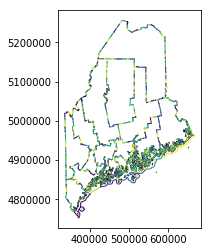

In [15]:
maine.plot()

In [21]:
maine.to_crs(epsg=5070)

,FMNOTE,FMPROCSS,FMSRC,FMSRCDAT,FMSRCORG,FMUPDDAT,FMUPDORG,LAND,RTAC,SOURCE,Shape_len,TYPE,geometry
0,,put,,1995-06-01,megis,1996-01-01,megis,y,,17,12.384992,coastline,LINESTRING (2255379.401322039 2769004.68469672...
1,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,7.911707,coastline,LINESTRING (2242128.86000305 2765058.207034987...
2,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,33.630542,coastline,LINESTRING (2120993.901467181 2729706.77052488...
3,,dig,24k,1899-12-30,usgs,1899-12-30,,y,y,1,1598.581638,county,LINESTRING (2144336.531345271 2738126.37437804...
4,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,43.908631,coastline,LINESTRING (2254761.938281595 2767996.83071436...
5,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,27.017117,coastline,LINESTRING (2254667.759994342 2767916.52119320...
6,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,26.870933,coastline,LINESTRING (2254697.473418737 2767455.34081347...
7,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,24.086731,coastline,LINESTRING (2254529.713594232 2767342.88258110...
8,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,31.474217,coastline,LINESTRING (2254347.820516976 2767081.93434870...
9,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,32.587698,coastline,LINESTRING (2254153.73642951 2766977.008865904...
